# Anomally Detection: Assignment 6
_____________________________________
by Matlotlo Dhlamini

### Import Libraries and Load Dataset

In [1]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 58.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df= pd.read_csv('Processed_Assen_RS_data.csv')


In [4]:
df.head()  # Data Preview

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0,27.564250,-25.105965,188,227,363,406,750,709,440
1,1,27.564548,-25.105963,126,144,215,166,917,479,232
2,2,27.564845,-25.105962,141,187,421,310,2263,947,438
3,3,27.565143,-25.105961,111,170,402,291,2558,1154,562
4,4,27.565440,-25.105960,232,365,658,779,2409,2199,1319


In [5]:
df.dtypes  # Check the datatypes

Unnamed: 0      int64
Longitude     float64
Latitude      float64
Band1           int64
Band2           int64
Band3           int64
Band4           int64
Band5           int64
Band6           int64
Band7           int64
dtype: object

In [6]:
# list of meta data
coord_names = ['Longitude', 'Latitude']
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce') #convert latitude to numeric
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce') #convert longitude to numeric



for band in bands:
    df[band] = np.abs(pd.to_numeric(df[band], errors='coerce')) #make all chemical composition  numeric


df.describe() #print cleaned combined df

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
count,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000
mean,24423.500000,27.606466,-25.128960,251.722547,316.526327,509.547433,609.615419,1648.147539,1801.414490,1216.814609
std,14101.347312,0.024398,0.013452,94.493587,106.311331,145.656643,238.682890,446.999961,469.584012,432.462650
min,0.000000,27.564250,-25.152291,0.000000,62.000000,149.000000,121.000000,150.000000,141.000000,102.000000
25%,12211.750000,27.585356,-25.140607,186.000000,248.000000,436.000000,467.000000,1382.000000,1539.000000,937.750000
50%,24423.500000,27.606466,-25.128958,245.000000,312.000000,498.000000,577.000000,1585.000000,1830.000000,1196.000000
75%,36635.250000,27.627580,-25.117309,312.000000,377.000000,562.000000,706.000000,1865.000000,2070.000000,1454.000000
max,48847.000000,27.648697,-25.105620,968.000000,1171.000000,1834.000000,2558.000000,5025.000000,4031.000000,3158.000000


## Data Pre-processing: Scaling

In [7]:
features = df[bands]

In [8]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features[bands])

features_scaled = pd.DataFrame(features_scaled,columns=features[bands].columns, index=features.index)
features_scaled

,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0.194215,0.148783,0.127003,0.116947,0.123077,0.146015,0.110602
1,0.130165,0.073940,0.039169,0.018465,0.157333,0.086889,0.042539
2,0.145661,0.112714,0.161424,0.077554,0.433436,0.207198,0.109948
3,0.114669,0.097385,0.150148,0.069758,0.493949,0.260411,0.150524
4,0.239669,0.273219,0.302077,0.270004,0.463385,0.529049,0.398233
...,...,...,...,...,...,...,...
48843,0.393595,0.348963,0.313353,0.313090,0.365333,0.593830,0.538940
48844,0.421488,0.379621,0.338872,0.359048,0.346667,0.617738,0.643325
48845,0.376033,0.317403,0.258160,0.276980,0.269538,0.548329,0.633835
48846,0.399793,0.318305,0.246884,0.256053,0.254154,0.529049,0.577552


## Data Pre-processing: Handling Missing Values

In [9]:
features.fillna(0, inplace=True)

<ipython-input-9-ff275283c1fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


## Band ratios

In [10]:
# Different band ratios (bands have already been scaled)

r = df['Band4']
g = df['Band3']
b = df['Band2']
B1 = df['Band1']
nir = df['Band5']
SWIR1 = df['Band6']
SWIR2 = df['Band7']


ferrous_minerals_ratio = (SWIR1/nir).values
ferric_iron_oxide = ((r + SWIR1)/nir).values
clay_minerals_ratio = (SWIR1/SWIR2).values


#False color Composite (FCC) 753
ndvi = ((nir.astype(float) - r.astype(float)) / (nir + r)).values  # Normalized Difference Vegetation Index (NDVI)
ndwi = ((nir.astype(float) - g.astype(float)) / (nir + g)).values  # Normalized Difference Water Index (NDWI)
B42 = (r/b).values
B57 = (nir/SWIR2).values  # Assuming this should be nir/SWIR2 as per your comment
B54 = (nir/r).values


## Principal Component Analysis




In [11]:
# Selecting bands; Use the band ratios as the features for the anomally detectin to hopefully highlight anomalies and creat a more targeted approach

pca_data = np.column_stack((ferrous_minerals_ratio.flatten(), ferric_iron_oxide.flatten(), clay_minerals_ratio.flatten(), ndvi.flatten(), ndwi.flatten(), B42.flatten(), B57.flatten(), B54.flatten()))


In [12]:
# Applying PCA
pca = PCA(n_components=3) #use 3 PC as per previous assessment
pc_comp = pca.fit_transform(pca_data)


In [13]:
#  Reconstruct Bands Using PCA

reconstructed_bands = pca.inverse_transform(pc_comp)

In [14]:
# Calculate the residuals
residuals = pca_data - reconstructed_bands

### Anomally Detection

##### Calculate the magnitude of the residuals

In [27]:
# This will be done for the first principal component as it contains more variance of the data than all the PC's and thus mor info

# pc_index = 0  Principal Component 1
residual_magnit_pc1 = np.sqrt(residuals[:, 0] ** 2) # Using vector

# Anomally threshold
std_dev_fact = 3.5 ## More domain knowledge may be needed to now the most suitable threshold
threshold_pc1 = np.mean(residual_magnit_pc1) + std_dev_fact * np.std(residual_magnit_pc1)

In [28]:
# Identifying Anomalies

anomalies_pc1 = residual_magnit_pc1 > threshold_pc1


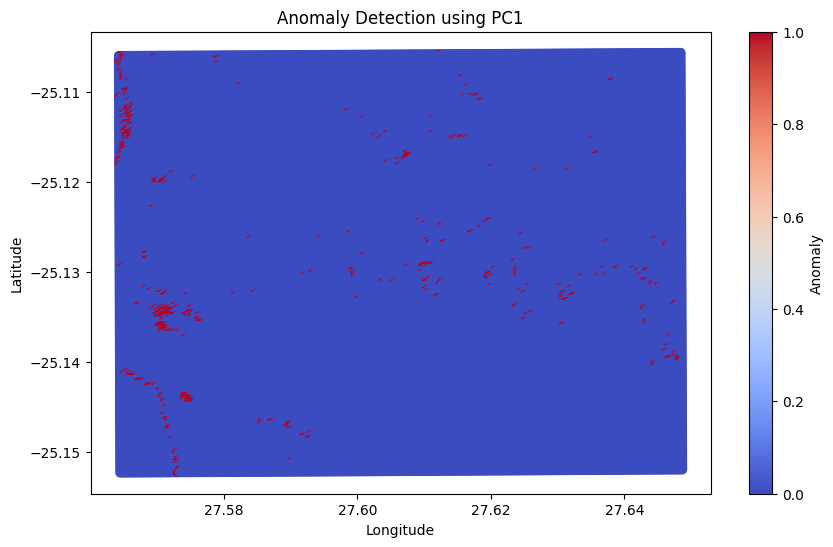

In [29]:
# Visualize

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=anomalies_pc1, cmap='coolwarm')
plt.title('Anomaly Detection using PC1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Anomaly')
plt.show()


#### Observation:

The first observation is that the map has no clear form of terrain. This may be due to using PCA features that are ratios rather than the individual bands for remote mapping.

The visualization shows anomalies of ferrous minerals as red specks that are generally scattered in the horizontal centre of the map. Compaering my plot with that provided by DR. Steve Zhang, I have managed to generally determined the areas of anomallies, however, these have been determined more in data points rather than a gesospatial distribution. There is large anomally detection in the middle most part of the map in Dr Zhang's plot, however mine highlights mainly anomallies in the south west and north western regions.

Decreasing the standard deviation factor to 2, gives a better anomally detection and provides a similar plot to that provided by Dr. Zhang.

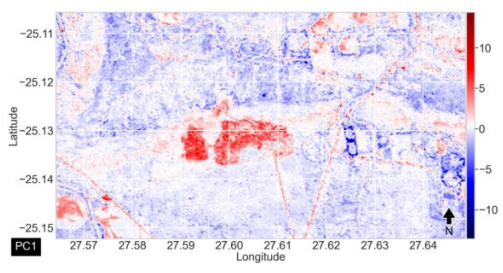